In [20]:
from netCDF4 import Dataset
from cartoplot import cartoplot
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import string
import pickle

In [10]:
ERS1_d = Dataset('/home/robbie/Dropbox/book_chapter/data/ers1_seaice_thickness_mean_march_1993to2001.nc')

ERS1_d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    created_by: Andrew P. Barrett
    creation_date: Thu Nov 29 16:27:03 2012
    source: sea ice thickness derived from IceBridge data by University of Kansas
    dimensions(sizes): col(180), row(180), point(32400), corner(4)
    variables(dimensions): float32 row(row), float32 col(col), float32 lat(row,col), float32 lon(row,col), float32 lat_corner(point,corner), float32 lon_corner(point,corner), float32 thickness(row,col)
    groups: 

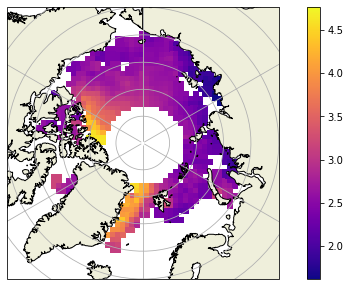

In [11]:
cartoplot(ERS1_d['lon'],ERS1_d['lat'],ERS1_d['thickness'])

/tmp/ipykernel_12100/2052372985.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  IS_thickness = np.array(IS_d['thickness'])


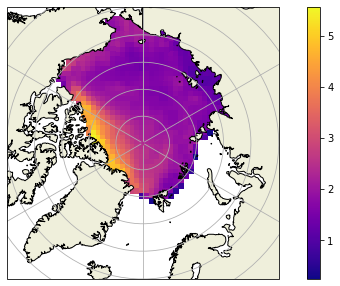

In [12]:
IS_d = Dataset('/home/robbie/Dropbox/book_chapter/data/icesat_seaice_thickness_mean_spring_2004to2009.nc')

IS_thickness = np.array(IS_d['thickness'])

IS_thickness[IS_thickness>10] = np.nan

IS_thickness[IS_thickness==0] = np.nan

cartoplot(IS_d['lon'],IS_d['lat'],IS_thickness)

In [13]:
d = Dataset('/home/robbie/Dropbox/SM_Thickness/data/Envisat_CCI/2003/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200303-fv2.0.nc')

envi_lons = np.array(d['lon'])
envi_lats = np.array(d['lat'])

def get_envi_march(year):
    d = Dataset(f'/home/robbie/Dropbox/SM_Thickness/data/Envisat_CCI/{year}/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-{year}03-fv2.0.nc')
    
    sit = np.array(d['sea_ice_thickness'][0])
    
    return(sit)

march_sits = []
for year in np.arange(2003,2013):
    
    march_sit = get_envi_march(year)
    
    march_sits.append(march_sit)
    
envi_spring_sit = np.nanmean(march_sits,axis=0)

/tmp/ipykernel_12100/1496333617.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  envi_lons = np.array(d['lon'])
/tmp/ipykernel_12100/1496333617.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  envi_lats = np.array(d['lat'])
/tmp/ipykernel_12100/1496333617.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

In [14]:
def get_march_AWI_SIT(year):
    
    d = Dataset(f'/home/robbie/Dropbox/SM_Thickness/data/AWI_CS2/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-{year}03-fv2p3.nc')
    
    SIT = np.array(d['sea_ice_thickness'][0])
    
    return SIT

d = Dataset('/home/robbie/Dropbox/SM_Thickness/data/AWI_CS2/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-201103-fv2p3.nc')

AWI_lons = np.array(d['lon'])
AWI_lats = np.array(d['lat'])

years = np.arange(2011,2022)

AWI_sits = []

for year in years:
    
    AWI_sit = get_march_AWI_SIT(year)
    
    AWI_sits.append(AWI_sit)
    
AWI_spring_sit = np.nanmean(AWI_sits,axis=0)

#     AWI_sit_r[np.isnan(composite)] = np.nan

/tmp/ipykernel_12100/2555244123.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  AWI_lons = np.array(d['lon'])
/tmp/ipykernel_12100/2555244123.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  AWI_lats = np.array(d['lat'])
/tmp/ipykernel_12100/2555244123.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

/tmp/ipykernel_12100/2228454739.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  SIT = np.array(d['ice_thickness'])
/tmp/ipykernel_12100/2228454739.py:14: RuntimeWarning: Mean of empty slice
  mean_IS2_sit = np.nanmean([get_IS2_SIT(2020),


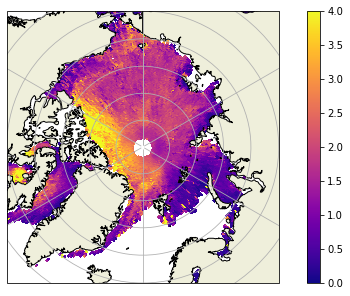

In [32]:
d = Dataset('/home/robbie/Dropbox/book_chapter/data/is2_gridded_thickness/IS2SITMOGR4_01_201903_004_001.nc')
IS2_lons = d['longitude']    
IS2_lats = d['latitude']

def get_IS2_SIT(year):
    
    d = Dataset(f'/home/robbie/Dropbox/book_chapter/data/is2_gridded_thickness/IS2SITMOGR4_01_{year}03_004_001.nc')
    
    SIT = np.array(d['ice_thickness'])
    
    return SIT
    
    
mean_IS2_sit = np.nanmean([get_IS2_SIT(2020),
                           get_IS2_SIT(2019),
#                            get_IS2_SIT(2021),
                          ],axis=0)

cartoplot(IS2_lons,IS2_lats,mean_IS2_sit,color_scale=(0,4))

In [33]:
isp = pickle.load(open('/home/robbie/Dropbox/SM_Thickness/code/ICESAT/icesat_spring.p','rb'))

ist = isp[2]

ist[isp[1] > 86] = np.nan


/tmp/ipykernel_12100/2160129734.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.pcolormesh(ERS1_d['lon'],ERS1_d['lat'],ERS1_d['thickness'][:-1,:-1],


Text(0.5, 1.2, 'Spring Sea Ice Thickness')

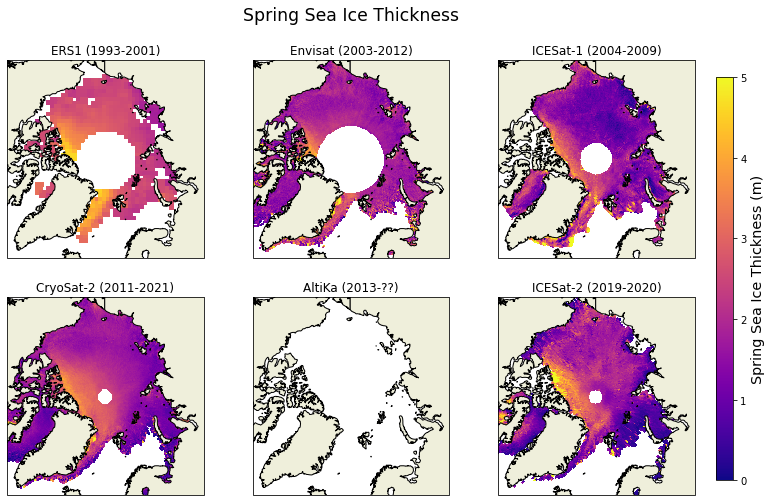

In [34]:


fig, axs = plt.subplots(2,3,
                        figsize=(12,8),
                        subplot_kw={'projection':ccrs.NorthPolarStereo()})

for ax in axs.reshape(-1):
    
    ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())
    
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    

(ax1,ax2,ax3,ax4,ax5,ax6) = axs.reshape(-1)

ax1.set_title('ERS1 (1993-2001)',fontsize='large')

ax1.pcolormesh(ERS1_d['lon'],ERS1_d['lat'],ERS1_d['thickness'][:-1,:-1],
               vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')

ax2.set_title('Envisat (2003-2012)',fontsize='large')

ax2.pcolormesh(envi_lons,envi_lats,envi_spring_sit[:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')


ax3.set_title('ICESat-1 (2004-2009)',fontsize='large')

ax3.pcolormesh(isp[0],isp[1],isp[2][:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')



ax4.set_title('CryoSat-2 (2011-2021)',fontsize='large')

ax4.pcolormesh(envi_lons,envi_lats,AWI_spring_sit[:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')

ax5.set_title('AltiKa (2013-??)',fontsize='large')


ax6.set_title('ICESat-2 (2019-2020)',fontsize='large')

sit = ax6.pcolormesh(IS2_lons,IS2_lats,mean_IS2_sit[:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')



fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = fig.colorbar(sit, cax=cbar_ax)

cb.set_label('Spring Sea Ice Thickness (m)', fontsize='x-large')

ax2.annotate('Spring Sea Ice Thickness',fontsize='xx-large',xycoords='axes fraction',ha='center',xy=(0.5,1.2))


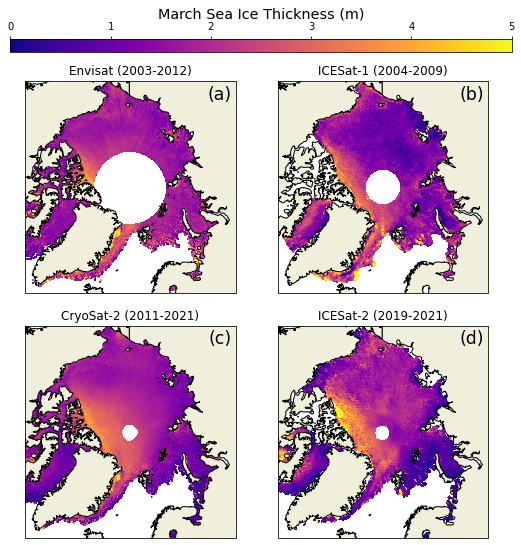

In [35]:


fig, axs = plt.subplots(2,2,
                        figsize=(8,9),
                        subplot_kw={'projection':ccrs.NorthPolarStereo()})

for ax in axs.reshape(-1):
    
    ax.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())
    
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    

(ax1,ax2,ax3,ax4) = axs.reshape(-1)


ax1.set_title('Envisat (2003-2012)',fontsize='large')

ax1.pcolormesh(envi_lons,envi_lats,envi_spring_sit[:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')


ax2.set_title('ICESat-1 (2004-2009)',fontsize='large')

ax2.pcolormesh(isp[0],isp[1],isp[2][:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')



ax3.set_title('CryoSat-2 (2011-2021)',fontsize='large')

ax3.pcolormesh(envi_lons,envi_lats,AWI_spring_sit[:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')

ax4.set_title('AltiKa (2013-??)',fontsize='large')


ax4.set_title('ICESat-2 (2019-2021)',fontsize='large')

sit = ax4.pcolormesh(IS2_lons,IS2_lats,mean_IS2_sit[:-1,:-1],
              vmin = 0, vmax = 5,
                 transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')



fig.subplots_adjust(right=0.93)

cbar_ax = fig.add_axes([0.1, 0.9, 0.87, 0.02])

cb = fig.colorbar(sit, cax=cbar_ax,orientation='horizontal')

cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')

cb.set_label('March Sea Ice Thickness (m)', fontsize='x-large')



plt.subplots_adjust(hspace=0.0)

# plt.tight_layout()

for ax, letter in zip([ax1,ax2,ax3,ax4],string.ascii_letters):
    ax.annotate(f'({letter})',fontsize='xx-large',xy=(0.98,0.98),
                va='top',ha='right',
                xycoords='axes fraction',
                 zorder=10)

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'
plt.savefig(f'{data_dir}/fig3.jpg',dpi=500, bbox_inches='tight')

plt.show()

In [16]:
d = Dataset('/media/robbie/TOSHIBA EXT/icesat/ICESAT/361/03_2007_ICESAT.nc')
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(361), y(361)
    variables(dimensions): float64 freeboard(x,y), float32 lon(x,y), float32 lat(x,y)
    groups: 

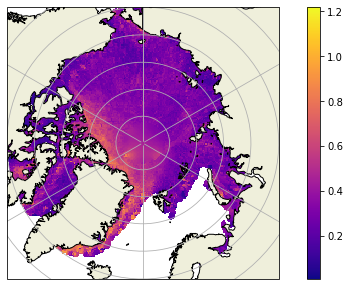

In [17]:
cartoplot(d['lon'],d['lat'],d['freeboard'])

In [36]:
d = Dataset('/home/robbie/Dropbox/book_chapter/data/SIT_NH_2013_2019_CS2_SnowKaKu.ease2_12500_smth50000.nc/SIT_NH_2013_2019_CS2_SnowKaKu.ease2_12500_smth50000.nc')

d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Monthly Altimetric SIT products from c2esaC
    projection: laea
    grid_type: np2ease
    lat_ts: 0
    lon_0: 0
    pixel_size: 12500
    width: 6250000
    height: 6250000
    lat_0: 90
    lat_min: 61.8772498200144
    lat_max: 90
    nb_pixels_x: 500
    nb_pixels_y: 500
    filtering: distance
    range_filter: 50000
    contact: ctoh_products@legos.obs-mip.fr, florent.garnier@legos.obs-mip.fr, sara.fleury@legos.obs-mip.fr
    institution: CTOH/LEGOS/CNRS-CNES-IRD-Universite de Toulouse III
    Conventions: CF-1.6
    date_of_creation: 2019-10-09 19:32:59.129860
    production: CTOH/LEGOS
    copyright_statement: Copyright CTOH/LEGOS
    reference: F.GARNIER, S Fleury, A.Laforge, F Remy, B.Meyssignac
    command: cmd
    license: https://www.aviso.altimetry.fr/fileadmin/documents/data/License_Aviso.pdf
    references: https://www.aviso.altimetry.fr/fileadmin/documents/data/to

In [94]:
tf = np.array(d['freeboard_tot'])

tf[tf>10] = np.nan
tf[tf<0] = np.nan

cartoplot(d['longitude'], d['latitude'], d['freeboard_tot'][1])

/tmp/ipykernel_12100/10637644.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sd = d['freeboard_tot'][1]-d['freeboard_radar'][1]


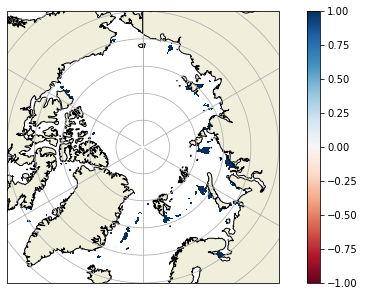

In [46]:
sd = d['freeboard_tot'][1]-d['freeboard_radar'][1]

sd[sd>0.01] = np.nan
sd[sd==0] = 1

cartoplot(d['longitude'], d['latitude'], sd ,color_scale=(-1,1), color_scheme='RdBu')

In [47]:
d['freeboard_tot'].shape

(38, 500, 500)